In [1]:
import warnings
warnings.filterwarnings('ignore')

# Instalacja i importowanie potrzebnych bibliotek

## Zgdonie z <i> https://www.tensorflow.org/install/pip?hl=pl </i>

Musimy użyć tensorflow <2.11 ponieważ, powyżej może nie współgrac z Windows (Informacja ze strony oficjanej dokumentacji tensorflow)

<hr>

Poleceniem '<i>conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0</i>' instalujemy sterowniki CUDA do obsługi tensorflow za pomocą condy

<hr>

Następnie instalujemy pakiet tensorflow w python '<i>pip3 uninstall "tensorflow<2.11"</i>' oraz resztę potrzebnych biliotek

<hr>

Następnie sprawdzamy istalację

## WAŻNE! Trzeba zmienić środowisko jupiera na środowisko alternatywne condy i doinstalowac pakiet ipykernel do tego środowiska

In [2]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-978.59216, shape=(), dtype=float32)


In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Jak widać tensorflow działa, możemy przejść do zadania

<hr>

# Wczytywanie danych "MNIST"

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Eksploracja danych

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

# Wizualaizacja cyfr

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

24 losowe cyfry treningowe

In [11]:
import numpy as np

index = np.random.choice(np.arange(len(X_train)),24, replace= False)

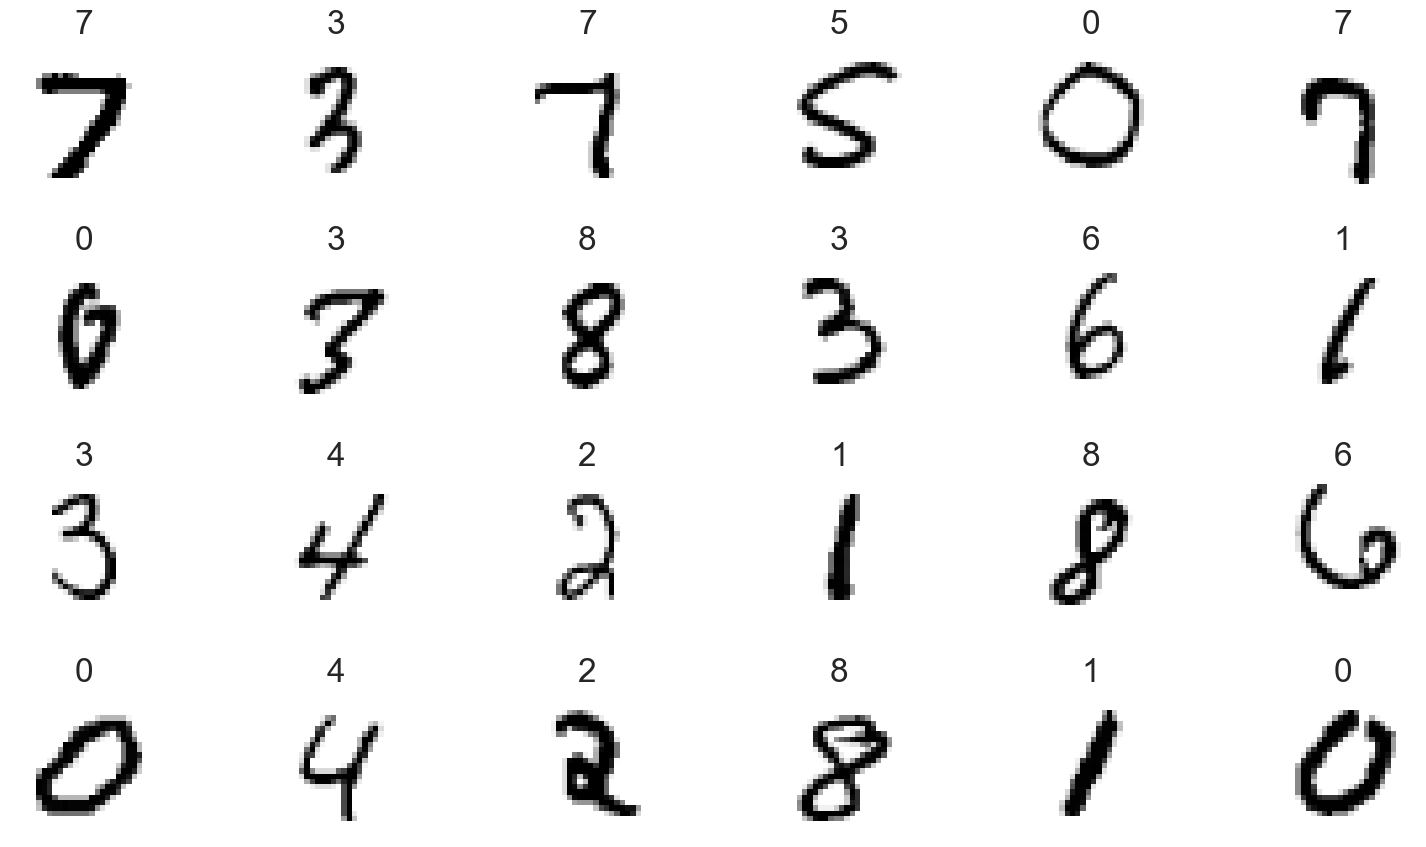

In [12]:
figure, axes = plt.subplots(nrows = 4, ncols = 6, figsize=(16,9))
for axes, image, target in zip(axes.ravel(), X_train[index], y_train[index]):
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_yticks([])
    axes.set_xticks([])
    axes.set_title(target)
    plt.tight_layout()

# Zmiana strutury danych

In [13]:
X_train = X_train.reshape((60000,28,28,1))
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test = X_test.reshape((10000,28,28,1))
X_test.shape

(10000, 28, 28, 1)

## Normalizacja

In [15]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## Kodowanie z 'gorącą jedynką'

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

# Budowanie sieci neuronowej

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
cnn = Sequential()

## Dodawanie warastw do sieci

In [22]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

### Dodanie warstwy konwolucji

In [23]:
cnn.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape = (28, 28, 1)))

### Dodanie warstwy łączącej

In [24]:
cnn.add(MaxPooling2D(pool_size= (2, 2)))

### Dodawanie kolejnych warstw (konwolucji + łączącej)

In [25]:
cnn.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"))
cnn.add(MaxPooling2D(pool_size= (2, 2)))

### Spłaszczanie wyników

In [26]:
cnn.add(Flatten())

### Dodanie warstwy gestej w celu redukcji liczby cech

In [27]:
cnn.add(Dense(units = 128, activation = "relu"))

### Dodanie kolejnej warstwy gestej produkującej wynik klasyfikacji

In [28]:
cnn.add(Dense(units = 10, activation = "softmax"))

## Podsumowanie modelu

In [29]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

# Wizualizacja struktury

In [30]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

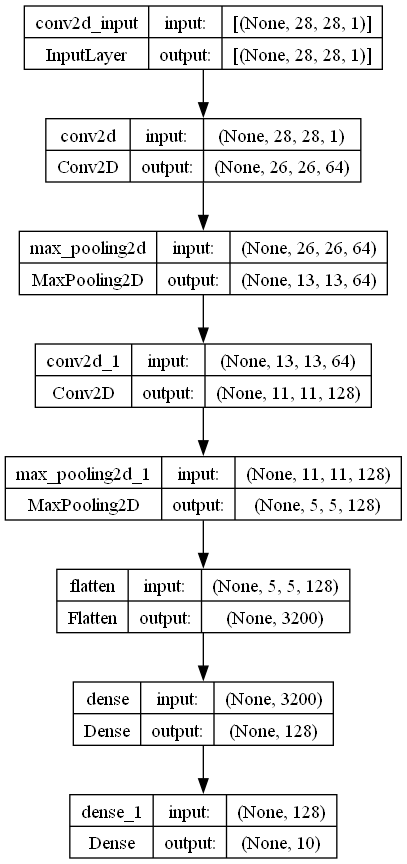

In [32]:
plot_model(cnn, to_file='convnet.png', show_shapes= True, show_layer_names = True)
Image(filename='convnet.png')

# Kompilowanie modelu

In [35]:
cnn.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Trenowanie i ewaluacja modelu

<hr>

## Trenowanie

In [36]:
cnn.fit(X_train, y_train, epochs = 5, batch_size = 64, validation_split = 0.1)

Epoch 1/5
844/844 [==============================] - 29s 17ms/step - loss: 0.1445 - accuracy: 0.9556 - val_loss: 0.0472 - val_accuracy: 0.9873
Epoch 2/5
844/844 [==============================] - 13s 15ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0359 - val_accuracy: 0.9897
Epoch 3/5
844/844 [==============================] - 13s 16ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 4/5
844/844 [==============================] - 13s 16ms/step - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0355 - val_accuracy: 0.9908
Epoch 5/5
844/844 [==============================] - 12s 14ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0383 - val_accuracy: 0.9900


## Ewaluacja

In [37]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0300 - accuracy: 0.9909


# Prognozowanie

In [38]:
prognoza = cnn.predict(X_test)

313/313 [==============================] - 3s 7ms/step


In [39]:
for indeks, przypuszczenie in enumerate(prognoza[0]):
    print(f'{indeks}: {przypuszczenie:.10%}')

0: 0.0000000029%
1: 0.0000002826%
2: 0.0000000450%
3: 0.0000056560%
4: 0.0000000000%
5: 0.0000000033%
6: 0.0000000000%
7: 99.9998807907%
8: 0.0000000546%
9: 0.0001033892%


Prognoza działa poprawnie, prawie ze 100% pewnością, aleeee...

## Wyszukiwanie chybionych prognoz

In [40]:
obrazy = X_test.reshape((10000, 28, 28))
chybione_prognozy = []

In [41]:
for i, (p, e) in enumerate(zip(prognoza, y_test)):
    prognozowany, spodziewany = np.argmax(p), np.argmax(e)
    if prognozowany != spodziewany:
        chybione_prognozy.append((i, obrazy[i], prognozowany, spodziewany))

In [42]:
len(chybione_prognozy)

91

### Wizualiazacja chybionych prognoz (pierwszych 24)

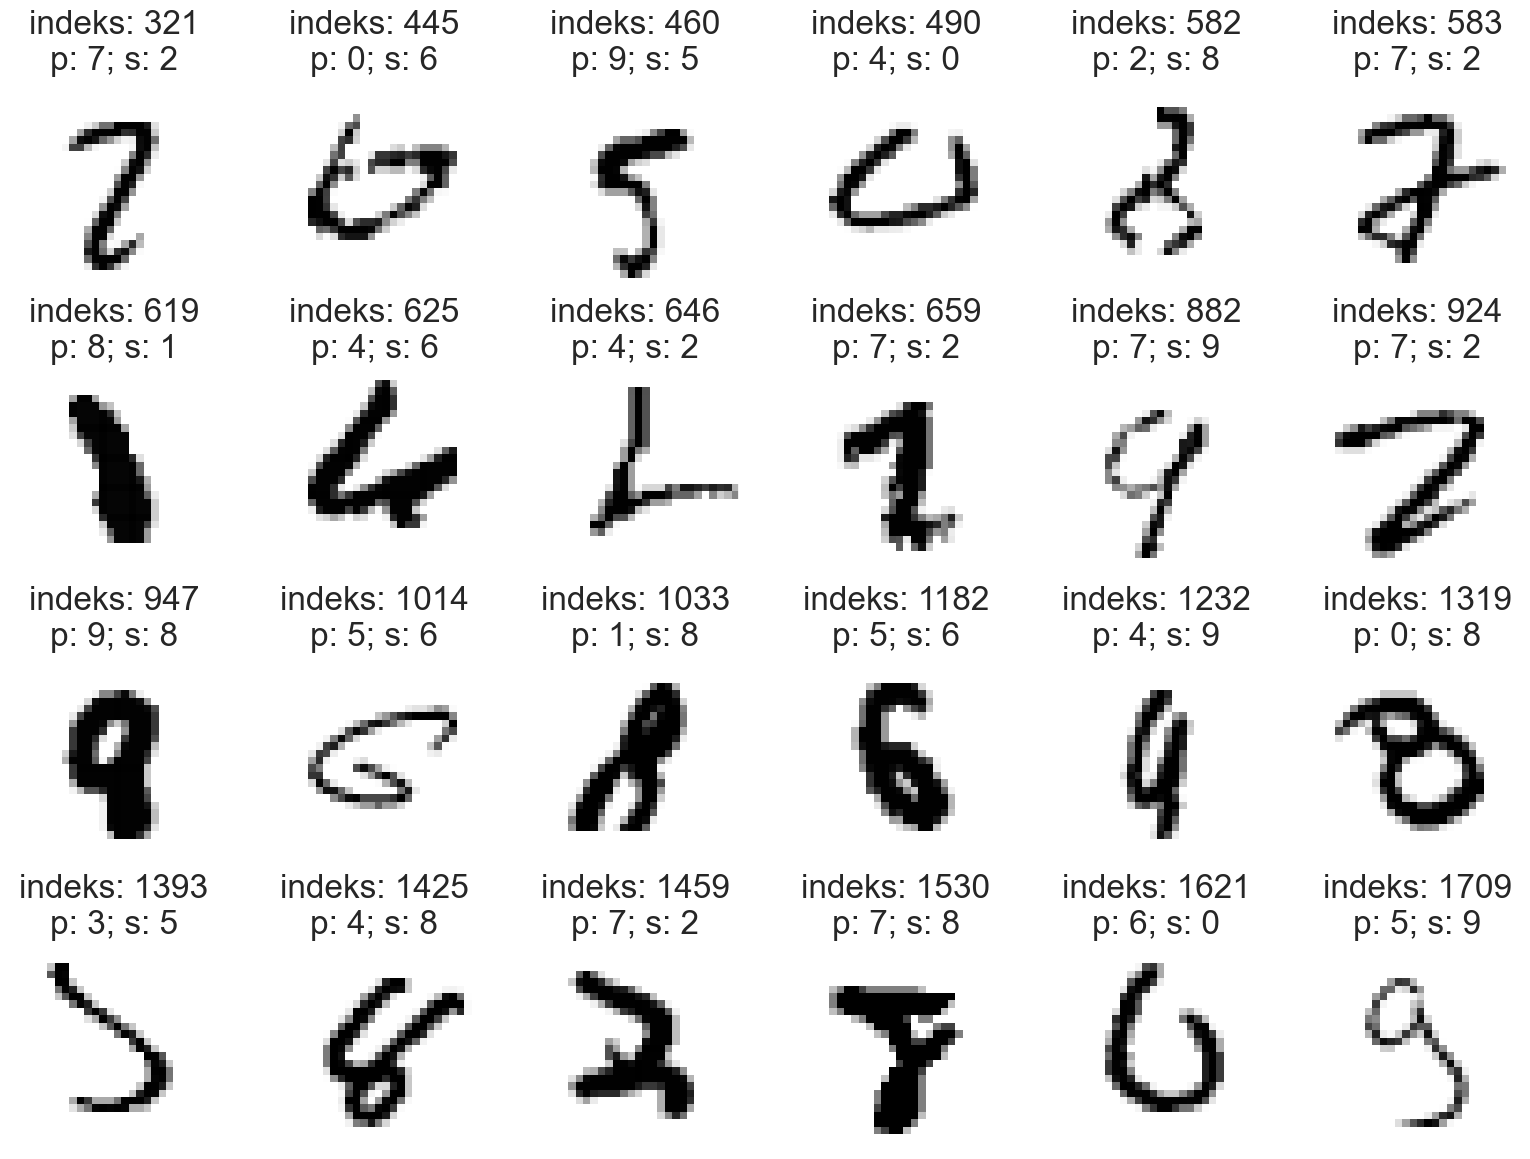

In [44]:
figure, axes = plt.subplots( nrows = 4, ncols = 6, figsize = (16,12))

for axes, element in zip(axes.ravel(), chybione_prognozy):
    indeks, obraz, prognozowany, spodziewany = element
    axes.imshow(obraz, cmap = plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'indeks: {indeks}\np: {prognozowany}; s: {spodziewany}')

plt.tight_layout()

# Rysowanie swoich liczb

<hr>

## Wczytanie potrzebnych bibliotek

In [51]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf

## Wczytanie własnych obrazów i ich oznaczeń (klasyfikacji)

In [150]:
# Ścieżka do katalogu z obrazami
images_directory = "moje"

# Inicjalizacja pustej listy do przechowywania obrazów
images = []
labels = []

# Przechodzenie przez pliki w katalogu
for filename in os.listdir(images_directory):
    if filename.endswith(".png"):
        # Wczytaj obraz i przekształć go
        image_path = os.path.join(images_directory, filename)
        original_image = Image.open(image_path).convert("L")
        scaled_image = original_image.resize((28, 28))
        image_array = np.array(scaled_image)

        # Odwróć kolory
        inverted_image_array = 255 - image_array

        normalized_image = inverted_image_array / 255.0
        images.append(normalized_image)

        # Dodaj etykietę odpowiadającą cyfrze od 0 do 9
        label = int(filename[0])  # Zakłada, że pierwszy znak w nazwie pliku to cyfra
        labels.append(label)

# Konwertuj listę obrazów na tensor
images_tensor = tf.convert_to_tensor(images, dtype=tf.float32)
labels_tensor = tf.one_hot(labels, depth=10, dtype=tf.float32)

# Zamień labels_tensor na zwykłą tablicę tablic (lista list)
labels_array = np.array(labels_tensor.numpy().tolist(), dtype = 'float32')

# Dodaj wymiar do tensora, aby uzyskać strukturę
images_tensor = tf.expand_dims(images_tensor, axis=-1)
images_tensor = np.array(images_tensor)

In [151]:
# Wyświetl informacje o strukturze danych
print("Shape of images tensor:", images_tensor.shape)
print("Shape of labels tensor:", labels_tensor.shape)

Shape of images tensor: (10, 28, 28, 1)
Shape of labels tensor: (10, 10)


In [152]:
labels_array[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [153]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Wyświetlanie danych wczytanych

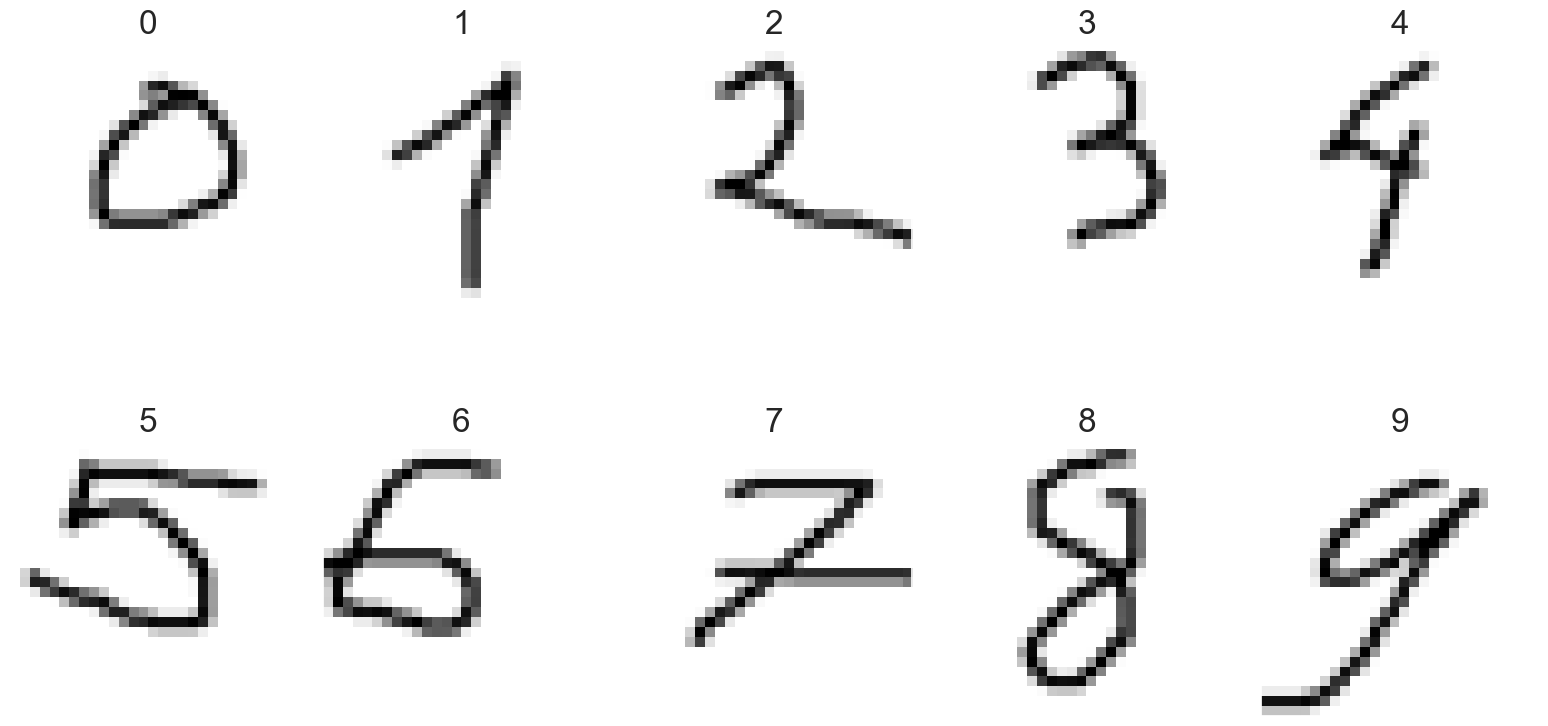

In [154]:
figure, axes = plt.subplots(nrows = 2, ncols = 5, figsize=(16,9))
for axes, image, target in zip(axes.ravel(), images_tensor, [0,1,2,3,4,5,6,7,8,9]):
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_yticks([])
    axes.set_xticks([])
    axes.set_title(target)
plt.tight_layout()

Wygląd się zgadza z danymi w MIST

## Ewaluacja

In [155]:
loss, accuracy = cnn.evaluate(images_tensor, labels_array)

1/1 [==============================] - 0s 76ms/step - loss: 2.4753 - accuracy: 0.5000


## Predykcja

In [156]:
prognoza = cnn.predict(images_tensor)

1/1 [==============================] - 0s 68ms/step


In [157]:
for i in range(len(prognoza)):
    print(f'===================== Obraz {i} ====================')
    for indeks, przypuszczenie in enumerate(prognoza[i]):
        print(f'{indeks}: {przypuszczenie:.10%}')

===================== Obraz 0 ====================
0: 44.7647303343%
1: 0.0000003408%
2: 0.0046230696%
3: 0.0000197046%
4: 0.0954605115%
5: 0.0000147358%
6: 0.0213043037%
7: 0.0051963256%
8: 0.1249092864%
9: 54.9837350845%
===================== Obraz 1 ====================
0: 0.0000034807%
1: 3.4318074584%
2: 0.0195436427%
3: 0.0567180803%
4: 0.0179759474%
5: 0.0004092257%
6: 0.0000581818%
7: 96.4477300644%
8: 0.0031099116%
9: 0.0226397999%
===================== Obraz 2 ====================
0: 0.0000000291%
1: 0.0138333417%
2: 87.8749251366%
3: 0.0029583618%
4: 12.0995514095%
5: 0.0000000088%
6: 0.0000093598%
7: 0.0087262699%
8: 0.0000005888%
9: 0.0000000243%
===================== Obraz 3 ====================
0: 0.1639779890%
1: 0.0023478528%
2: 7.8467510641%
3: 90.3538942337%
4: 0.0008934581%
5: 0.0001969821%
6: 0.0001339608%
7: 1.6309332103%
8: 0.0000351218%
9: 0.0008331171%
===================== Obraz 4 ====================
0: 0.0000435201%
1: 0.4615410697%
2: 0.1100965077%
3: 0.001

Już widzimy ciekawy problem z klasyfikacją, ale zobaczmy, jak to wyszło

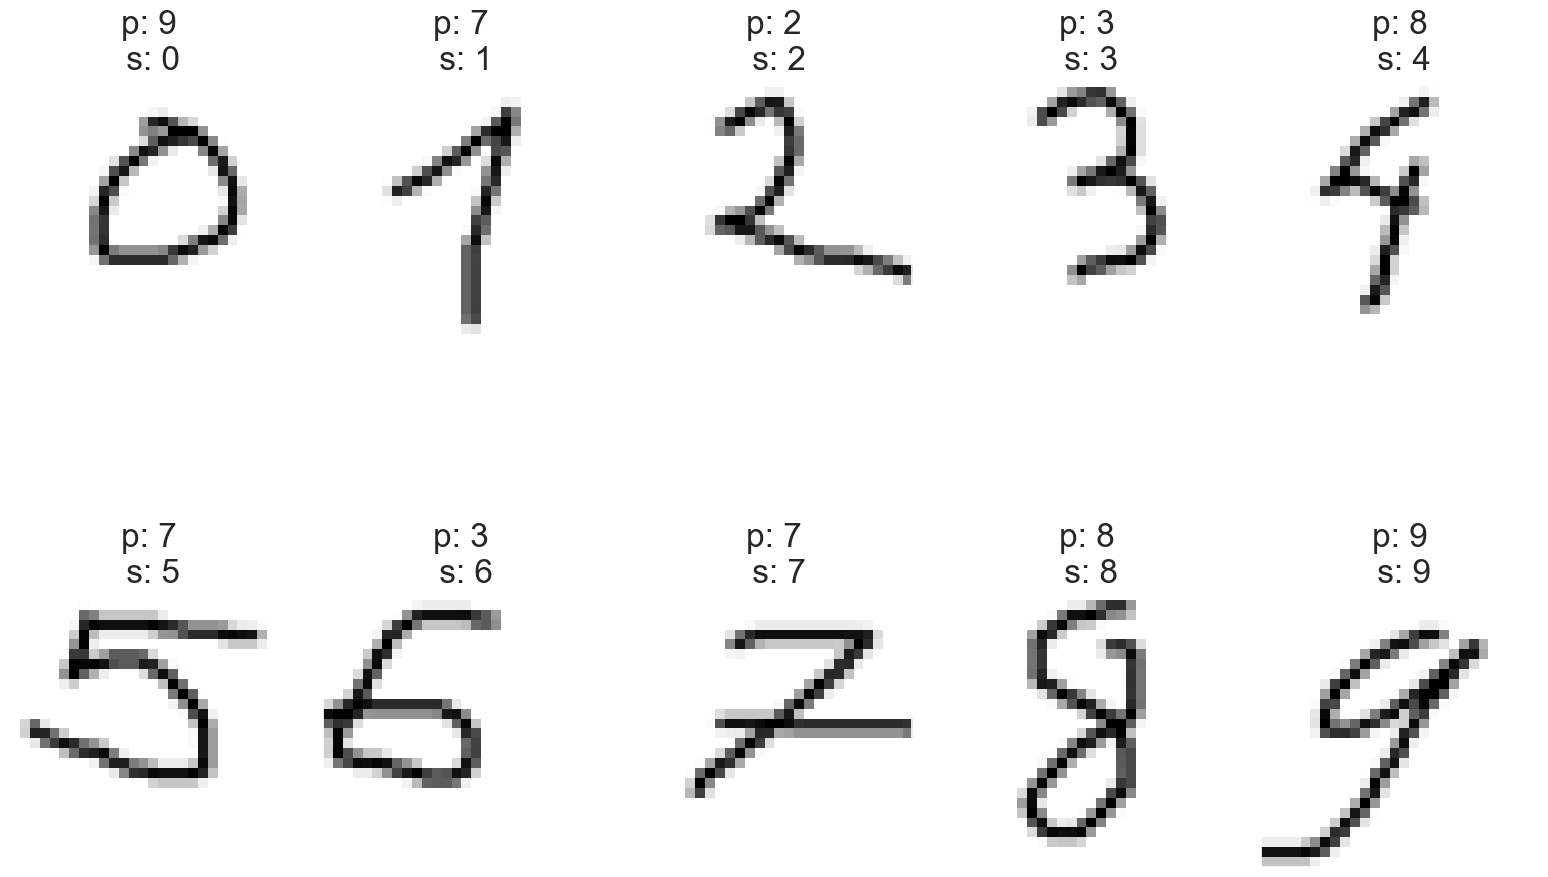

In [158]:
figure, axes = plt.subplots( nrows = 2, ncols = 5, figsize = (16,12))

obrazy = images_tensor.reshape((10, 28, 28))

prognozy_moje = []
for i, (p, e) in enumerate(zip(prognoza, labels_array)):
    prognozowany, spodziewany = np.argmax(p), np.argmax(e)
    prognozy_moje.append((obrazy[i], prognozowany, spodziewany))

for axes, element in zip(axes.ravel(), prognozy_moje):
    obraz, prognozowany, spodziewany = element
    axes.imshow(obraz, cmap = plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'p: {prognozowany}\n s: {spodziewany}')

plt.tight_layout()

# Jak widać predykacja bywa złudna. Ale przyjrzyjmy się jeszcze działaniu algorytmu, gdyby tło było czarne, a cyfry białe, czyli zróbmy negatyw obrazów.

In [159]:
# Ścieżka do katalogu z obrazami
images_directory = "moje"

# Inicjalizacja pustej listy do przechowywania obrazów
images = []
labels = []

# Przechodzenie przez pliki w katalogu
for filename in os.listdir(images_directory):
    if filename.endswith(".png"):
        # Wczytaj obraz i przekształć go
        image_path = os.path.join(images_directory, filename)
        original_image = Image.open(image_path).convert("L")
        scaled_image = original_image.resize((28, 28))
        image_array = np.array(scaled_image)

        normalized_image = image_array / 255.0
        images.append(normalized_image)

        # Dodaj etykietę odpowiadającą cyfrze od 0 do 9
        label = int(filename[0])  # Zakłada, że pierwszy znak w nazwie pliku to cyfra
        labels.append(label)

# Konwertuj listę obrazów na tensor
images_tensor = tf.convert_to_tensor(images, dtype=tf.float32)
labels_tensor = tf.one_hot(labels, depth=10, dtype=tf.float32)

# Zamień labels_tensor na zwykłą tablicę tablic (lista list)
labels_array = np.array(labels_tensor.numpy().tolist(), dtype = 'float32')

# Dodaj wymiar do tensora, aby uzyskać strukturę
images_tensor = tf.expand_dims(images_tensor, axis=-1)
images_tensor = np.array(images_tensor)

In [160]:
loss, accuracy = cnn.evaluate(images_tensor, labels_array)

1/1 [==============================] - 0s 73ms/step - loss: 3.4816 - accuracy: 0.2000


In [161]:
prognoza = cnn.predict(images_tensor)

1/1 [==============================] - 0s 66ms/step


In [162]:
for i in range(len(prognoza)):
    print(f'===================== Obraz {i} ====================')
    for indeks, przypuszczenie in enumerate(prognoza[i]):
        print(f'{indeks}: {przypuszczenie:.10%}')

===================== Obraz 0 ====================
0: 5.8318380266%
1: 0.0104212355%
2: 0.0844164751%
3: 31.9718033075%
4: 20.6204101443%
5: 0.0493989093%
6: 2.8572063893%
7: 2.5965124369%
8: 2.9298353940%
9: 33.0481529236%
===================== Obraz 1 ====================
0: 2.7484891936%
1: 20.7635223866%
2: 0.1396379899%
3: 0.0217585490%
4: 8.1048160791%
5: 0.0353675627%
6: 0.2706411993%
7: 67.1035289764%
8: 0.5692786537%
9: 0.2429612447%
===================== Obraz 2 ====================
0: 0.0234405670%
1: 6.7449606955%
2: 23.1831938028%
3: 0.7564663421%
4: 60.3317797184%
5: 0.0192948108%
6: 0.4094309639%
7: 8.5269980133%
8: 0.0043173299%
9: 0.0001106656%
===================== Obraz 3 ====================
0: 1.9936891273%
1: 0.1360220369%
2: 2.1952489391%
3: 5.5551834404%
4: 3.9743062109%
5: 2.3575460538%
6: 53.1737625599%
7: 1.2930334546%
8: 28.9837628603%
9: 0.3374396591%
===================== Obraz 4 ====================
0: 6.0260944068%
1: 8.1271022558%
2: 3.2722141594%
3: 0.

Prawdopodobieństwo jest równo rozłożone. Zobaczmy to na wykresie predykcji.

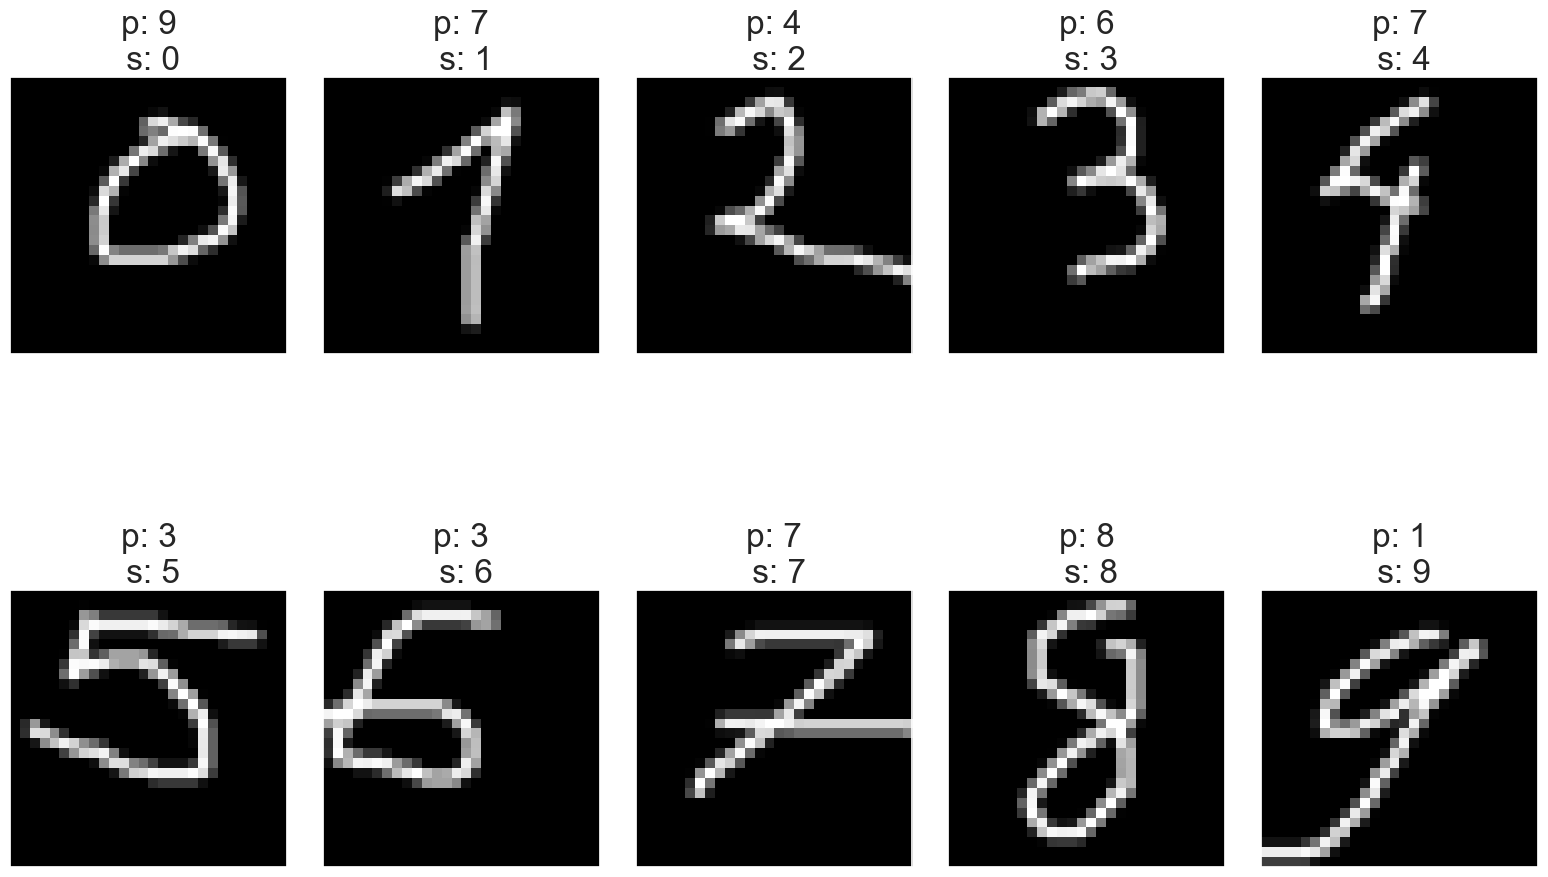

In [163]:
figure, axes = plt.subplots( nrows = 2, ncols = 5, figsize = (16,12))

obrazy = images_tensor.reshape((10, 28, 28))

prognozy_moje = []
for i, (p, e) in enumerate(zip(prognoza, labels_array)):
    prognozowany, spodziewany = np.argmax(p), np.argmax(e)
    prognozy_moje.append((obrazy[i], prognozowany, spodziewany))

for axes, element in zip(axes.ravel(), prognozy_moje):
    obraz, prognozowany, spodziewany = element
    axes.imshow(obraz, cmap = plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'p: {prognozowany}\n s: {spodziewany}')

plt.tight_layout()

# Jak widać algorytm średnio sobie radzi z negatywami, ale na moich przykładach też się wywaliło ;/